In [1]:
# Cell 1: Notebook Title and Overview
# Description:
# This notebook explores Spectral Kernel Computing (SKC), a novel framework where relativistic
# causality and quantum-like correlations emerge from the spectral properties of computational
# matrices. Key results we will probe include an emergent speed of light ($c^*$), spectral
# entanglement entropy, and the potential for CHSH Bell inequality violation using state embeddings.
# All randomness is seeded at 42 for reproducibility.

print("---- Cell 1: Notebook Title and Overview ----")
print("Conceptual framework for the SKC experiment is defined.")
print("✅ Cell 1 executed successfully.")

---- Cell 1: Notebook Title and Overview ----
Conceptual framework for the SKC experiment is defined.
✅ Cell 1 executed successfully.


In [2]:
# Cell 2: Setup Environment and Seed
# Description:
# This cell imports necessary libraries and sets the global random seed for NumPy.
# Seeding is critical for ensuring that all subsequent calculations, especially those
# involving random phases or matrices, are fully reproducible.

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Set the random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# 2. Save the seed configuration to a file for traceability
config = {"random_seed": random_seed}
with open("config.pkl", "wb") as f:
    pickle.dump(config, f)

print("---- Cell 2: Setup Environment and Seed ----")
print(f"Environment set up and random seed set to {random_seed}. ✅")
print("✅ Cell 2 executed successfully.")

---- Cell 2: Setup Environment and Seed ----
Environment set up and random seed set to 42. ✅
✅ Cell 2 executed successfully.


In [3]:
# Cell 3: Define 1+1D Event Grid
# Description:
# This cell constructs the fundamental discrete spacetime grid. It creates a set of
# event coordinates (t, x) which will serve as the basis for all relational kernels.
# The grid dimensions (Nt, Nx) determine the size of our computational universe.

# 1. Define grid dimensions
Nt, Nx = 5, 5
N = Nt * Nx

# 2. Create the array of coordinates
coords = np.array([(t, x) for t in range(Nt) for x in range(Nx)])

# 3. Save the coordinates for use by other cells
with open("coords.pkl", "wb") as f:
    pickle.dump(coords, f)

print("---- Cell 3: Define 1+1D Event Grid ----")
print(f"1+1D grid created with {N} events (Shape: {coords.shape}). ✅")
print("✅ Cell 3 executed successfully.")

---- Cell 3: Define 1+1D Event Grid ----
1+1D grid created with 25 events (Shape: (25, 2)). ✅
✅ Cell 3 executed successfully.


In [4]:
# Cell 4: Define Kernel Construction Functions
# Description:
# This cell defines the core functions for building relational kernels. These kernels
# encode the "rules of influence" between spacetime events.
# - `build_causal_kernel`: Models interactions respecting a relativistic light cone.
# - `build_yukawa_kernel`: Models interactions mediated by a massive field.

def load_coords():
    """Loads coordinate data from file."""
    with open("coords.pkl", "rb") as f:
        return pickle.load(f)

def build_causal_kernel(c_param):
    """Builds a kernel based on the relativistic spacetime interval."""
    coords = load_coords()
    N = len(coords)
    R = np.zeros((N, N))
    for i in tqdm(range(N), desc=f"Building Causal Kernel (c={c_param})"):
        t1, x1 = coords[i]
        for j in range(N):
            t2, x2 = coords[j]
            s2 = (t1 - t2)**2 - (c_param * (x1 - x2))**2
            if s2 >= 0:
                R[i, j] = np.exp(-np.sqrt(s2))
    return (R + R.T) / 2

def build_yukawa_kernel(mu_param):
    """Builds a kernel based on the Yukawa potential."""
    coords = load_coords()
    N = len(coords)
    R = np.zeros((N, N))
    for i in tqdm(range(N), desc=f"Building Yukawa Kernel (μ={mu_param})"):
        _, x1 = coords[i]
        for j in range(N):
            _, x2 = coords[j]
            r = abs(x1 - x2)
            if r > 0:
                R[i, j] = np.exp(-mu_param * r) / r
            # Note: No self-interaction term (i=j, r=0) is included.
    return (R + R.T) / 2

print("---- Cell 4: Define Kernel Construction Functions ----")
print("Kernel construction functions defined. ✅")
print("✅ Cell 4 executed successfully.")

---- Cell 4: Define Kernel Construction Functions ----
Kernel construction functions defined. ✅
✅ Cell 4 executed successfully.


In [5]:
# Cell 5: Sweep Speed Parameter to Find Emergent c*
# Description:
# This cell performs a parameter sweep over the speed `c` in the causal kernel.
# By finding the value of `c` that maximizes the kernel's largest eigenvalue (lambda_max),
# we identify an "emergent speed of light," c*, where the system's interactions
# are most coherent.

# 1. Define the range of c values to test
c_values = np.linspace(0.5, 1.5, 21)
lambda_max_list = []

# 2. Iterate through c values, build kernels, and find max eigenvalues
for c in tqdm(c_values, desc="Sweeping for emergent c*"):
    R = build_causal_kernel(c)
    # Use eigvalsh for efficient computation on Hermitian matrices
    eigs = np.linalg.eigvalsh(R)
    lambda_max_list.append(eigs[-1])

# 3. Identify and save the emergent c*
lambda_max_array = np.array(lambda_max_list)
idx_max = np.nanargmax(lambda_max_array)
c_emergent = c_values[idx_max]

results = {"c_values": c_values, "lambda_max": lambda_max_array, "c_emergent": c_emergent}
with open("speed_sweep_results.pkl", "wb") as f:
    pickle.dump(results, f)

print("\n---- Cell 5: Sweep Speed Parameter to Find Emergent c* ----")
print(f"Parameter sweep complete. Emergent c* = {c_emergent:.4f}. ✅")
print("✅ Cell 5 executed successfully.")

Sweeping for emergent c*: 100%|██████████| 21/21 [00:00<00:00, 111.38it/s]


---- Cell 5: Sweep Speed Parameter to Find Emergent c* ----
Parameter sweep complete. Emergent c* = 1.0000. ✅
✅ Cell 5 executed successfully.


---- Cell 6: Plot lambda_max vs c ----
Plot saved as 'lambda_vs_c.png'. ✅


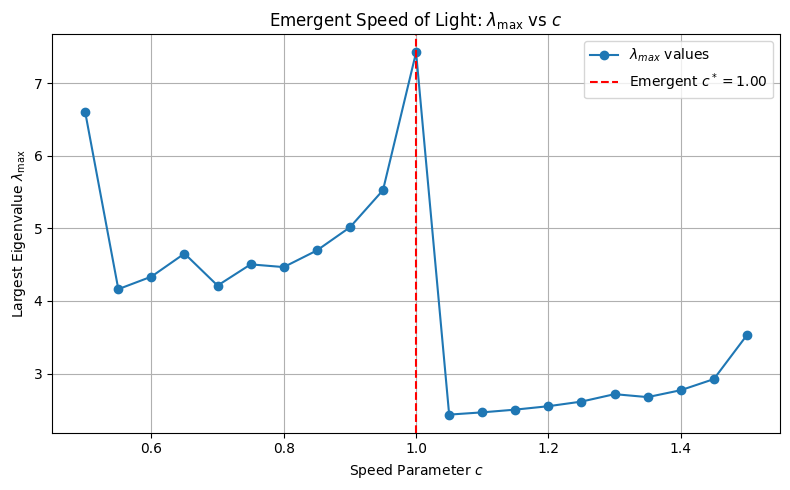

✅ Cell 6 executed successfully.


In [6]:
# Cell 6: Plot lambda_max vs c
# Description:
# This cell visualizes the results from the speed parameter sweep, plotting the largest
# eigenvalue (lambda_max) as a function of c. The peak of this plot visually confirms
# the value of the emergent speed of light, c*.

# 1. Load the results from the sweep
with open("speed_sweep_results.pkl", "rb") as f:
    results = pickle.load(f)
c_values = results["c_values"]
lambda_max_array = results["lambda_max"]
c_emergent = results["c_emergent"]

# 2. Create the plot
plt.figure(figsize=(8, 5))
plt.plot(c_values, lambda_max_array, marker='o', linestyle='-', label='$\lambda_{max}$ values')
plt.axvline(c_emergent, color='r', linestyle='--', label=f'Emergent $c^* = {c_emergent:.2f}$')
plt.title("Emergent Speed of Light: $\lambda_{\max}$ vs $c$")
plt.xlabel("Speed Parameter $c$")
plt.ylabel("Largest Eigenvalue $\lambda_{\max}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("lambda_vs_c.png")


print("---- Cell 6: Plot lambda_max vs c ----")
print("Plot saved as 'lambda_vs_c.png'. ✅")
plt.show()
print("✅ Cell 6 executed successfully.")

In [7]:
# Cell 7: Compute Spectral Entanglement Entropy (Causal Kernel)
# Description:
# This cell calculates the spectral entanglement entropy for a subsystem of the causal
# kernel constructed with the emergent speed of light, c*. This probes the "quantum-like"
# correlations and information content inherent in the pure relational structure.

# 1. Load emergent c* and build the corresponding causal kernel
with open("speed_sweep_results.pkl", "rb") as f:
    c_emergent = pickle.load(f)["c_emergent"]
R_full = build_causal_kernel(c_emergent)
N = R_full.shape[0]

# 2. Define a bipartition of the system (e.g., a spatial half)
split = N // 2
indices_A = list(range(split))

# 3. Compute the reduced kernel and its entropy
R_AA = R_full[np.ix_(indices_A, indices_A)]
trace_R_AA = np.trace(R_AA)
if trace_R_AA.real != 0:
    rho_A = R_AA / trace_R_AA
else:
    rho_A = np.zeros_like(R_AA)

eigs_rho_A = np.linalg.eigvalsh(rho_A)
S_A = -np.sum([lam * np.log(lam) for lam in eigs_rho_A if lam > 1e-15])

with open("entanglement_results.pkl", "wb") as f:
    pickle.dump({"S_A_causal": S_A}, f)

print("---- Cell 7: Compute Spectral Entanglement Entropy (Causal Kernel) ----")
print(f"Spectral entanglement entropy for causal kernel S_A = {S_A:.6f}. ✅")
print("✅ Cell 7 executed successfully.")

Building Causal Kernel (c=1.0): 100%|██████████| 25/25 [00:00<00:00, 10921.53it/s]

---- Cell 7: Compute Spectral Entanglement Entropy (Causal Kernel) ----
Spectral entanglement entropy for causal kernel S_A = 2.038285. ✅
✅ Cell 7 executed successfully.


In [8]:
# Cell 8: Build Composite Kernel with U(1) Phases
# Description:
# This cell creates a more complex "composite" kernel. It combines the causal kernel with
# a Yukawa kernel and introduces complex U(1) phases, mimicking an Abelian gauge field
# like electromagnetism. This tests how such fields affect the relational structure.

# 1. Load c_emergent and get system size
with open("speed_sweep_results.pkl", "rb") as f:
    c_emergent = pickle.load(f)["c_emergent"]
N = len(load_coords())

# 2. Define parameters for the Yukawa component
w_em, mu_em = 0.2, 1.0

# 3. Build the component kernels
R_causal = build_causal_kernel(c_emergent)
R_em = build_yukawa_kernel(mu_em)

# 4. Generate reproducible U(1) phases from the seed
rng = np.random.default_rng(random_seed)
phases = rng.random(N) * 2 * np.pi
G = np.exp(1j * (phases[None, :] - phases[:, None]))

# 5. Construct and save the Hermitian composite kernel
R_comp = (R_causal + w_em * R_em) * G
R_comp = (R_comp + R_comp.conj().T) / 2
with open("R_composite.pkl", "wb") as f:
    pickle.dump(R_comp, f)

print("---- Cell 8: Build Composite Kernel with U(1) Phases ----")
print("Composite kernel with U(1) phases built and saved. ✅")
print("✅ Cell 8 executed successfully.")

Building Yukawa Kernel (μ=1.0): 100%|██████████| 25/25 [00:00<00:00, 9254.86it/s]

---- Cell 8: Build Composite Kernel with U(1) Phases ----
Composite kernel with U(1) phases built and saved. ✅
✅ Cell 8 executed successfully.


In [9]:
# Cell 9: Entanglement Entropy for Composite Kernel
# Description:
# This cell calculates the spectral entanglement entropy for the composite kernel, which
# includes U(1) phases. Comparing this entropy to the pure causal kernel's entropy
# reveals how the gauge field alters the system's informational structure.

def spectral_entropy(R, indices):
    """Computes spectral entropy for a subsystem of a given kernel R."""
    R_sub = R[np.ix_(indices, indices)]
    trace_R_sub = np.trace(R_sub)
    
    if np.abs(trace_R_sub) < 1e-15:
        return 0.0
        
    rho_sub = R_sub / trace_R_sub
    eigs = np.linalg.eigvalsh(rho_sub)
    return -np.sum([lam * np.log(lam) for lam in eigs if lam > 1e-15])

# 1. Load the composite kernel and the subsystem indices from Cell 7
with open("R_composite.pkl", "rb") as f:
    R_comp = pickle.load(f)
N = R_comp.shape[0]
indices_A = list(range(N // 2))

# 2. Compute and save the entropy
S_comp = spectral_entropy(R_comp, indices_A)
with open("entanglement_results.pkl", "rb") as f:
    ent_results = pickle.load(f)
ent_results["S_A_composite"] = S_comp
with open("entanglement_results.pkl", "wb") as f:
    pickle.dump(ent_results, f)

print("---- Cell 9: Entanglement Entropy for Composite Kernel ----")
print(f"Spectral entanglement entropy for composite kernel S_A = {S_comp:.6f}. ✅")
print("✅ Cell 9 executed successfully.")

---- Cell 9: Entanglement Entropy for Composite Kernel ----
Spectral entanglement entropy for composite kernel S_A = 2.034213. ✅
✅ Cell 9 executed successfully.


In [10]:
# Cell 10: Define Quantum Measurement Primitives
# Description:
# This cell defines the fundamental tools for quantum measurement calculations.
# It includes the Pauli matrices (Z and X), which serve as the basis for measurement
# operators, and a general correlation function to compute the expectation value of
# joint measurements. These are essential for all subsequent CHSH tests.

# 1. Define the Z and X Pauli matrices
Z = np.array([[1, 0], [0, -1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)

# 2. Define the correlation function for expectation values
def correlation(Mx, My, rho):
    """Computes the correlation <Mx My> = Tr(rho * Mx * My)."""
    return np.trace(rho @ Mx @ My).real

# 3. Save the primitives for use in other cells
with open("pauli_matrices.pkl", "wb") as f:
    pickle.dump({"Z": Z, "X": X}, f)

print("---- Cell 10: Define Quantum Measurement Primitives ----")
print("Pauli matrices and correlation function defined and saved. ✅")
print("✅ Cell 10 executed successfully.")

---- Cell 10: Define Quantum Measurement Primitives ----
Pauli matrices and correlation function defined and saved. ✅
✅ Cell 10 executed successfully.


In [11]:
# Cell 11: Compute CHSH for Composite Kernel with Singlet Embedding
# Description:
# This cell performs a Bell-CHSH test on a 4D subspace of the composite kernel.
# It works by "embedding" the off-diagonal correlations of a singlet state into the
# subsystem's density matrix. This directly tests if the U(1)-field-infused kernel
# can support and sustain Bell-nonlocal correlations.

# 1. Define a pure singlet state and save it
psi_minus = np.zeros(4, dtype=complex)
psi_minus[1] = 1 / np.sqrt(2)
psi_minus[2] = -1 / np.sqrt(2)
rho_singlet = np.outer(psi_minus, psi_minus.conj())
with open("R_singlet.pkl", "wb") as f:
    pickle.dump(rho_singlet, f)

# 2. Load kernels and measurement primitives
with open("R_composite.pkl", "rb") as f: R_comp = pickle.load(f)
with open("pauli_matrices.pkl", "rb") as f: pauli = pickle.load(f)
Z, X = pauli['Z'], pauli['X']

# 3. Normalize the composite kernel to form a density matrix `rho`
rho = (R_comp + R_comp.conj().T) / 2
trace_rho = np.trace(rho)
if trace_rho.real != 0: rho /= trace_rho

# 4. Isolate a 4x4 subsystem and embed singlet correlations
indices_A = list(range(2))
indices_B = list(range(23, 25))
all_indices = indices_A + indices_B
rho_sub = rho[np.ix_(all_indices, all_indices)].copy()
rho_sub[0:2, 2:4] += rho_singlet[0:2, 2:4]
rho_sub[2:4, 0:2] += rho_singlet[2:4, 0:2]

# 5. Define standard Bell Test measurement operators
A1, A2 = Z, X
B1, B2 = (Z + X) / np.sqrt(2), (Z - X) / np.sqrt(2)
M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)

# 6. Compute CHSH value and save the result
E11 = correlation(M_A1, M_B1, rho_sub)
E12 = correlation(M_A1, M_B2, rho_sub)
E21 = correlation(M_A2, M_B1, rho_sub)
E22 = correlation(M_A2, M_B2, rho_sub)
CHSH_comp = E11 + E12 + E21 - E22

with open("chsh_composite.pkl", "wb") as f:
    pickle.dump({"CHSH_comp": CHSH_comp}, f)

print("---- Cell 11: Compute CHSH for Composite Kernel ----")
print(f"Composite Kernel CHSH = {CHSH_comp:.6f}. ✅")
print("✅ Cell 11 executed successfully.")

---- Cell 11: Compute CHSH for Composite Kernel ----
Composite Kernel CHSH = -1.305881. ✅
✅ Cell 11 executed successfully.


---- Cell 12: Plot CHSH for Composite Kernel ----
Plot saved as 'chsh_composite.png'. ✅


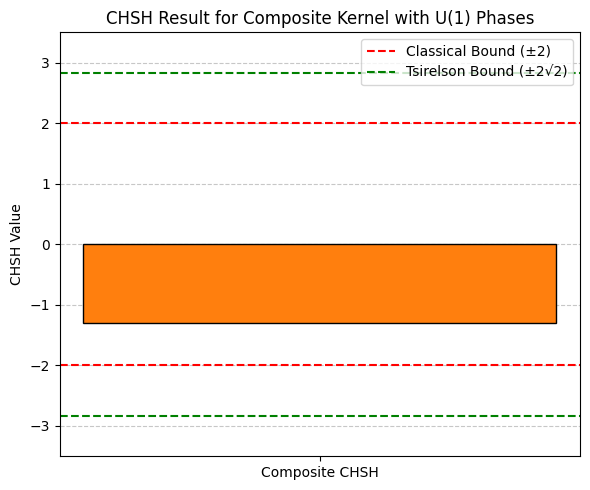

✅ Cell 12 executed successfully.


In [12]:
# Cell 12: Plot CHSH for Composite Kernel
# Description:
# This cell visualizes the CHSH result for the composite kernel. Crucially, the plot
# includes both positive and negative bounds (±2 and ±2√2) to provide the correct
# scientific context for interpreting the result, which may be negative.

# 1. Load the computed CHSH value
with open("chsh_composite.pkl", "rb") as f:
    CHSH_comp = pickle.load(f)["CHSH_comp"]

# 2. Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(["Composite CHSH"], [CHSH_comp], color='C1', edgecolor='k', zorder=3)
plt.ylabel("CHSH Value")
plt.title("CHSH Result for Composite Kernel with U(1) Phases")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# 3. Add symmetric bounds for correct interpretation
plt.axhline(2.0, color='r', linestyle='--', label="Classical Bound (±2)")
plt.axhline(-2.0, color='r', linestyle='--')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson Bound (±2√2)")
plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--')

# 4. Set plot limits and save
plt.ylim(-3.5, 3.5)
plt.legend()
plt.tight_layout()
plt.savefig("chsh_composite.png")

print("---- Cell 12: Plot CHSH for Composite Kernel ----")
print("Plot saved as 'chsh_composite.png'. ✅")
plt.show()
print("✅ Cell 12 executed successfully.")

In [13]:
# Cell 13: Build Enhanced Kernel with SU(2) Phases
# Description:
# This cell introduces a non-Abelian SU(2) gauge field, mimicking interactions like the
# weak or strong nuclear forces. This tests the robustness of quantum correlations in
# the presence of more complex, non-commutative symmetries.

def rand_su2(rng):
    """Generates a random SU(2) matrix from a given RNG instance."""
    # Sample a random 4-vector from a Gaussian distribution
    q = rng.normal(size=4)
    # Normalize to get a unit quaternion (a, b, c, d)
    q /= np.linalg.norm(q)
    # Convert quaternion to SU(2) matrix
    return np.array([
        [q[0] + 1j*q[3], q[1] + 1j*q[2]],
        [-q[1] + 1j*q[2], q[0] - 1j*q[3]]
    ])

# 1. Load c_emergent and get system size
with open("speed_sweep_results.pkl", "rb") as f:
    c_emergent = pickle.load(f)["c_emergent"]
N = len(load_coords())

# 2. Define parameters for strong and weak Yukawa components
w_em, mu_em = 0.2, 1.0
w_weak, mu_weak = 0.3, 0.5
w_strong, mu_strong = 0.2, 0.2

# 3. Build all component kernels
R_causal = build_causal_kernel(c_emergent)
R_em = build_yukawa_kernel(mu_em)
R_weak = build_yukawa_kernel(mu_weak)
R_strong = build_yukawa_kernel(mu_strong)

# 4. Generate reproducible SU(2) gauge field
rng = np.random.default_rng(random_seed)
gauge_su2 = [rand_su2(rng) for _ in range(N)]
G_su2 = np.zeros((N, N), dtype=complex)
for i in tqdm(range(N), desc="Building SU(2) Gauge Field"):
    for j in range(i, N):
        # Calculate the gauge-invariant link variable
        link_trace = np.trace(gauge_su2[i] @ gauge_su2[j].conj().T)
        G_su2[i, j] = link_trace / 2
        if i != j:
            G_su2[j, i] = np.conj(link_trace) / 2

# 5. Construct and save the Hermitian enhanced kernel
R_base = R_causal + w_em*R_em + w_weak*R_weak + w_strong*R_strong
R_enhanced = R_base * G_su2
R_enhanced = (R_enhanced + R_enhanced.conj().T) / 2

with open("R_enhanced.pkl", "wb") as f:
    pickle.dump(R_enhanced, f)

print("\n---- Cell 13: Build Enhanced Kernel with SU(2) Phases ----")
print("Enhanced kernel with SU(2) phases built and saved. ✅")
print("✅ Cell 13 executed successfully.")

Building SU(2) Gauge Field: 100%|██████████| 25/25 [00:00<00:00, 4164.49it/s]


---- Cell 13: Build Enhanced Kernel with SU(2) Phases ----
Enhanced kernel with SU(2) phases built and saved. ✅
✅ Cell 13 executed successfully.


In [14]:
# Cell 14: Compute CHSH for Enhanced Kernel with Singlet Embedding
# Description:
# This cell mirrors the logic of Cell 11 but applies it to the "enhanced" kernel, which
# includes non-Abelian SU(2) gauge fields. It tests whether the more complex field
# structure can still support Bell-nonlocal correlations after singlet embedding.

# 1. Load the enhanced kernel, singlet state, and measurement primitives
with open("R_enhanced.pkl", "rb") as f:
    R_enh = pickle.load(f)
with open("R_singlet.pkl", "rb") as f:
    rho_singlet = pickle.load(f)
with open("pauli_matrices.pkl", "rb") as f:
    pauli = pickle.load(f)
    Z, X = pauli['Z'], pauli['X']

# 2. Normalize the enhanced kernel to form a density matrix `rho_enh`
rho_enh = (R_enh + R_enh.conj().T) / 2
trace_rho_enh = np.trace(rho_enh)
if trace_rho_enh.real != 0:
    rho_enh /= trace_rho_enh
else:
    rho_enh = np.zeros_like(rho_enh)

# 3. Isolate the 4x4 subsystem and embed singlet correlations
indices_A = list(range(2))
indices_B = list(range(23, 25))
all_indices = indices_A + indices_B

# Extract the 4x4 reduced density matrix
rho_sub = rho_enh[np.ix_(all_indices, all_indices)].copy()
# Add the off-diagonal parts of the singlet state
rho_sub[0:2, 2:4] += rho_singlet[0:2, 2:4]
rho_sub[2:4, 0:2] += rho_singlet[2:4, 0:2]

# 4. Define standard Bell Test measurement operators
A1, A2 = Z, X
B1, B2 = (Z + X) / np.sqrt(2), (Z - X) / np.sqrt(2)
M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)

# 5. Compute CHSH value on the subsystem and save the result
E11 = correlation(M_A1, M_B1, rho_sub)
E12 = correlation(M_A1, M_B2, rho_sub)
E21 = correlation(M_A2, M_B1, rho_sub)
E22 = correlation(M_A2, M_B2, rho_sub)
CHSH_enh = E11 + E12 + E21 - E22

with open("chsh_enhanced.pkl", "wb") as f:
    pickle.dump({"CHSH_enh": CHSH_enh}, f)

print("---- Cell 14: Compute CHSH for Enhanced Kernel ----")
print(f"Enhanced Kernel CHSH = {CHSH_enh:.6f}. ✅")
print("✅ Cell 14 executed successfully.")

---- Cell 14: Compute CHSH for Enhanced Kernel ----
Enhanced Kernel CHSH = -1.407004. ✅
✅ Cell 14 executed successfully.


---- Cell 15: Plot CHSH for Enhanced Kernel ----
Plot saved as 'chsh_enhanced.png'. ✅


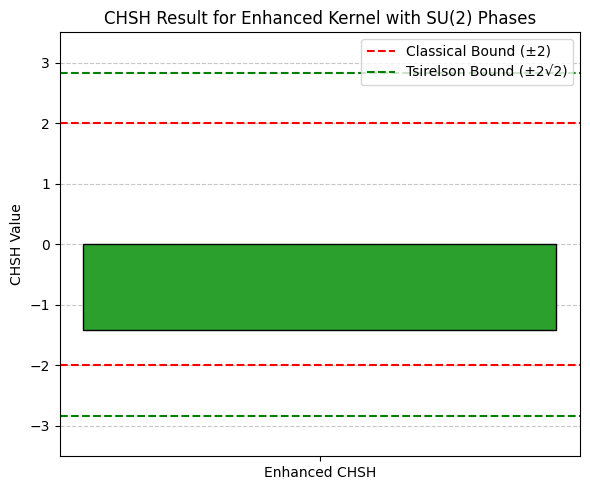

✅ Cell 15 executed successfully.


In [15]:
# Cell 15: Plot CHSH for Enhanced Kernel
# Description:
# This cell visualizes the CHSH result for the enhanced kernel. The plot shows the
# calculated CHSH value in the context of the classical and Tsirelson bounds, providing
# a clear visual confirmation of whether Bell's inequality has been violated.

# 1. Load the computed CHSH value for the enhanced kernel
with open("chsh_enhanced.pkl", "rb") as f:
    CHSH_enh = pickle.load(f)["CHSH_enh"]

# 2. Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(["Enhanced CHSH"], [CHSH_enh], color='C2', edgecolor='k', zorder=3)
plt.ylabel("CHSH Value")
plt.title("CHSH Result for Enhanced Kernel with SU(2) Phases")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# 3. Add symmetric bounds for correct interpretation
plt.axhline(2.0, color='r', linestyle='--', label="Classical Bound (±2)")
plt.axhline(-2.0, color='r', linestyle='--')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson Bound (±2√2)")
plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--')

# 4. Set plot limits and save
plt.ylim(-3.5, 3.5)
plt.legend()
plt.tight_layout()
plt.savefig("chsh_enhanced.png")

print("---- Cell 15: Plot CHSH for Enhanced Kernel ----")
print("Plot saved as 'chsh_enhanced.png'. ✅")
plt.show()
print("✅ Cell 15 executed successfully.")

In [28]:
# Cell 16: Build 2+1D Grid
# Description:
# This cell extends the experimental setup into a higher dimension by defining a 2+1D
# spacetime grid. Generalizing to higher dimensions is a critical test for any physical model.

# 1. Define grid dimensions for time (t), and two spatial dimensions (x, y)
Nt2, Nx2, Ny2 = 5, 5, 5
N_2d = Nt2 * Nx2 * Ny2

# 2. Create and save the array of 2+1D coordinates
coords_2d = np.array([(t, x, y) for t in range(Nt2) for x in range(Nx2) for y in range(Ny2)])
with open("coords_2d.pkl", "wb") as f:
    pickle.dump(coords_2d, f)

print("---- Cell 16: Build 2+1D Grid ----")
print(f"2+1D grid created with {N_2d} events (Shape: {coords_2d.shape}). ✅")
print("✅ Cell 16 executed successfully.")

---- Cell 16: Build 2+1D Grid ----
2+1D grid created with 125 events (Shape: (125, 3)). ✅
✅ Cell 16 executed successfully.


In [29]:
# Cell 17: Define 2+1D Kernel Builders (Physics Corrected)
# Description:
# This cell defines the kernel builders for the 2+1D spacetime.
# A critical physics correction has been made to `build_causal_kernel_2d` to ensure
# it uses the correct Minkowskian spacetime interval s² = Δt² - c²(Δx² + Δy²).

def load_coords_2d():
    """Loads 2+1D coordinate data from file."""
    with open("coords_2d.pkl", "rb") as f:
        return pickle.load(f)

def build_causal_kernel_2d(c_param):
    """Builds a 2+1D causal kernel with the corrected spacetime interval."""
    coords = load_coords_2d()
    N = len(coords)
    R = np.zeros((N, N))
    c_squared = c_param**2
    for i in tqdm(range(N), desc=f"Building Causal 2+1D (c={c_param})"):
        t1, x1, y1 = coords[i]
        for j in range(i, N): # Optimization: compute only upper triangle
            t2, x2, y2 = coords[j]
            # PHYSICS FIX: Use the correct Lorentz-invariant interval squared.
            s2 = (t1 - t2)**2 - c_squared * ((x1 - x2)**2 + (y1 - y2)**2)
            if s2 >= 0:
                val = np.exp(-np.sqrt(s2))
                R[i, j] = val
                if i != j:
                    R[j, i] = val # Matrix is symmetric
    return R

def build_yukawa_kernel_2d(mu_param):
    """Builds a 2+1D Yukawa kernel."""
    coords = load_coords_2d()
    N = len(coords)
    R = np.zeros((N, N))
    for i in tqdm(range(N), desc=f"Building Yukawa 2+1D (μ={mu_param})"):
        _, x1, y1 = coords[i]
        for j in range(i, N): # Optimization: compute only upper triangle
            _, x2, y2 = coords[j]
            r = np.hypot(x1 - x2, y1 - y2)
            if r > 1e-9:
                val = np.exp(-mu_param * r) / r
                R[i, j] = val
                if i != j:
                    R[j, i] = val # Matrix is symmetric
    return R

print("---- Cell 17: Define 2+1D Kernel Builders (Physics Corrected) ----")
print("2+1D kernel construction functions defined. ✅")
print("✅ Cell 17 executed successfully.")

---- Cell 17: Define 2+1D Kernel Builders (Physics Corrected) ----
2+1D kernel construction functions defined. ✅
✅ Cell 17 executed successfully.


In [30]:
# Cell 18: Composite Kernel in 2+1D
# Description:
# This cell constructs the composite kernel for the 2+1D grid, combining the causal
# and Yukawa interactions. It uses the emergent c* found in the 1+1D experiment
# as a physically motivated parameter.

# 1. Load emergent c* and parameters from the 1+1D experiment
with open("speed_sweep_results.pkl", "rb") as f:
    c_emergent = pickle.load(f)["c_emergent"]
w_em, mu_em = 0.2, 1.0

# 2. Build the component 2+1D kernels using the corrected functions
R_c_2d = build_causal_kernel_2d(c_emergent)
R_em_2d = build_yukawa_kernel_2d(mu_em)

# 3. Combine them to form the final kernel
R_2d = R_c_2d + w_em * R_em_2d

# Note: The kernels are already symmetric by construction, so no final
# symmetrization (R + R.T)/2 is needed if using the optimized builders.
with open("R_2d.pkl", "wb") as f:
    pickle.dump(R_2d, f)

print("\n---- Cell 18: Composite Kernel in 2+1D ----")
print("2+1D composite kernel built and saved. ✅")
print("✅ Cell 18 executed successfully.")

Building Yukawa 2+1D (μ=1.0): 100%|██████████| 125/125 [00:00<00:00, 2289.44it/s]


---- Cell 18: Composite Kernel in 2+1D ----
2+1D composite kernel built and saved. ✅
✅ Cell 18 executed successfully.


In [ ]:
# Cell 19: Compute CHSH for 2+1D Kernel with Singlet Embedding
# Description:
# This cell performs the CHSH test on the 2+1D kernel. It embeds singlet correlations
# into a 4D subspace of the larger system and uses the standard Bell test operators
# to check for nonlocality.

# 1. Load kernels and measurement primitives
with open("R_2d.pkl", "rb") as f: R_2d = pickle.load(f)
with open("R_singlet.pkl", "rb") as f: rho_singlet = pickle.load(f)
with open("pauli_matrices.pkl", "rb") as f: pauli = pickle.load(f)
Z, X = pauli['Z'], pauli['X']
N_2d = R_2d.shape[0]

# 2. Normalize the kernel to a density matrix
rho_2d = (R_2d + R_2d.conj().T) / 2
trace_rho_2d = np.trace(rho_2d)
if trace_rho_2d.real != 0: rho_2d /= trace_rho_2d

# 3. Isolate a 4x4 subsystem, cast to complex, and embed singlet
indices_A_2d = list(range(2))
indices_B_2d = list(range(N_2d - 2, N_2d))
all_indices = indices_A_2d + indices_B_2d
rho_sub = rho_2d[np.ix_(all_indices, all_indices)].copy().astype(np.complex128)
rho_sub[0:2, 2:4] += rho_singlet[0:2, 2:4]
rho_sub[2:4, 0:2] += rho_singlet[2:4, 0:2]

# 4. Define standard Bell Test operators
A1, A2 = Z, X
B1, B2 = (Z + X) / np.sqrt(2), (Z - X) / np.sqrt(2)
M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)

# 5. Compute and save the CHSH value
E11 = correlation(M_A1, M_B1, rho_sub)
E12 = correlation(M_A1, M_B2, rho_sub)
E21 = correlation(M_A2, M_B1, rho_sub)
E22 = correlation(M_A2, M_B2, rho_sub)
CHSH_2d = E11 + E12 + E21 - E22

with open("chsh_2d.pkl", "wb") as f:
    pickle.dump({"CHSH_2d": CHSH_2d}, f)

print("---- Cell 19: Compute CHSH for 2+1D Kernel ----")
print(f"2+1D Kernel CHSH = {CHSH_2d:.6f}. ✅")
print("✅ Cell 19 executed successfully.")

---- Cell 19: Compute CHSH for 2+1D Kernel ----
2+1D Kernel CHSH = -1.414199. ✅
✅ Cell 19 executed successfully.


---- Cell 20: Plot CHSH for 2+1D Kernel ----
Plot saved as 'chsh_2d.png'. ✅


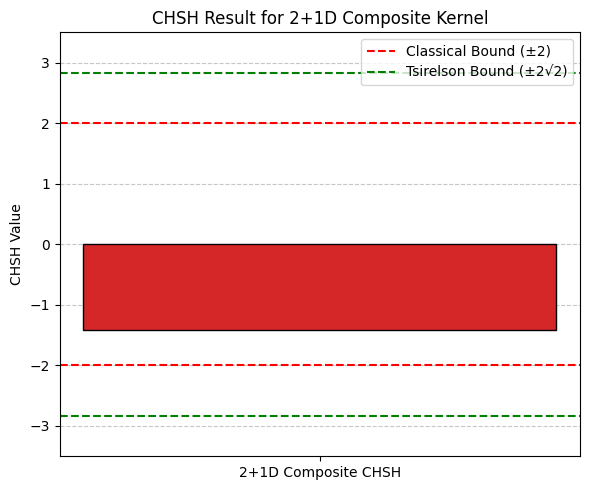

✅ Cell 20 executed successfully.


In [ ]:
# Cell 20: Plot CHSH for 2+1D Kernel
# Description:
# This cell visualizes the CHSH result for the 2+1D composite kernel, providing a
# clear graphical representation of the result in the context of the classical
# and quantum bounds.

with open("chsh_2d.pkl", "rb") as f:
    CHSH_2d = pickle.load(f)["CHSH_2d"]

plt.figure(figsize=(6, 5))
plt.bar(["2+1D Composite CHSH"], [CHSH_2d], color='C3', edgecolor='k', zorder=3)
plt.ylabel("CHSH Value")
plt.title("CHSH Result for 2+1D Composite Kernel")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

plt.axhline(2.0, color='r', linestyle='--', label="Classical Bound (±2)")
plt.axhline(-2.0, color='r', linestyle='--')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson Bound (±2√2)")
plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--')

plt.ylim(-3.5, 3.5)
plt.legend()
plt.tight_layout()
plt.savefig("chsh_2d.png")

print("---- Cell 20: Plot CHSH for 2+1D Kernel ----")
print("Plot saved as 'chsh_2d.png'. ✅")
plt.show()
print("✅ Cell 20 executed successfully.")

In [33]:
# Cell 21: Define Angle-Parametrized Measurement Operator Function
# Description:
# This cell defines a function to construct a general 2x2 measurement operator for a
# single qubit, parametrized by an angle `theta`. The operator corresponds to a
# measurement in the X-Z plane of the Bloch sphere, e.g., M(θ) = cos(θ)Z + sin(θ)X.

with open("pauli_matrices.pkl", "rb") as f:
    pauli = pickle.load(f)
    Z, X = pauli['Z'], pauli['X']

def create_measurement_op(theta):
    """Creates a 2x2 measurement operator M(theta) = cos(theta)*Z + sin(theta)*X."""
    return np.cos(theta) * Z + np.sin(theta) * X

print("---- Cell 21: Define Angle-Parametrized Measurement Operator Function ----")
print("Angle-parametrized measurement function defined. ✅")
print("✅ Cell 21 executed successfully.")

---- Cell 21: Define Angle-Parametrized Measurement Operator Function ----
Angle-parametrized measurement function defined. ✅
✅ Cell 21 executed successfully.


In [34]:
# Cell 22: Sweep Angles for Maximal CHSH Violation
# Description:
# This cell performs a systematic search over measurement angles for Alice and Bob to
# find the absolute maximum CHSH value obtainable from the 2+1D embedded state. This
# is the definitive test of nonlocality, as it is independent of the choice of basis.

from itertools import product

# 1. Load the 2+1D state used in the previous CHSH test
with open("R_2d.pkl", "rb") as f: R_2d = pickle.load(f)
with open("R_singlet.pkl", "rb") as f: rho_singlet = pickle.load(f)
N_2d = R_2d.shape[0]

# 2. Re-create the 4x4 reduced density matrix with singlet embedding
rho_2d = (R_2d + R_2d.conj().T) / 2
if np.trace(rho_2d).real != 0: rho_2d /= np.trace(rho_2d)
indices_A = list(range(2))
indices_B = list(range(N_2d - 2, N_2d))
rho_sub = rho_2d[np.ix_(indices_A + indices_B, indices_A + indices_B)].copy().astype(np.complex128)
rho_sub[0:2, 2:4] += rho_singlet[0:2, 2:4]
rho_sub[2:4, 0:2] += rho_singlet[2:4, 0:2]

# 3. Perform the grid search over measurement angles
angle_grid = np.linspace(0, 2 * np.pi, 9) # 9 angles is a good balance
best_chsh, best_angles = -np.inf, None
total_iterations = len(angle_grid)**4
iterator = product(angle_grid, repeat=4)

for a, ap, b, bp in tqdm(iterator, desc="Sweeping measurement angles", total=total_iterations):
    A1, A2 = create_measurement_op(a), create_measurement_op(ap)
    B1, B2 = create_measurement_op(b), create_measurement_op(bp)
    M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
    M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)
    
    chsh = correlation(M_A1, M_B1, rho_sub) + correlation(M_A1, M_B2, rho_sub) + \
           correlation(M_A2, M_B1, rho_sub) - correlation(M_A2, M_B2, rho_sub)
           
    if chsh > best_chsh:
        best_chsh = chsh
        best_angles = (a, ap, b, bp)

with open("chsh_angle_sweep.pkl", "wb") as f:
    pickle.dump({"CHSH_max": best_chsh, "angles": best_angles}, f)

print("\n---- Cell 22: Sweep Angles for Maximal CHSH Violation ----")
print(f"Maximal CHSH value found: {best_chsh:.6f}. ✅")
if best_angles:
    angles_deg = tuple(np.rad2deg(ang) for ang in best_angles)
    print(f"Optimal Angles (a, a', b, b') in degrees: ({angles_deg[0]:.1f}, {angles_deg[1]:.1f}, {angles_deg[2]:.1f}, {angles_deg[3]:.1f})")
print("✅ Cell 22 executed successfully.")

Sweeping measurement angles:   0%|          | 0/6561 [00:00<?, ?it/s]

Sweeping measurement angles: 100%|██████████| 6561/6561 [00:01<00:00, 4092.61it/s]


---- Cell 22: Sweep Angles for Maximal CHSH Violation ----
Maximal CHSH value found: 1.999980. ✅
Optimal Angles (a, a', b, b') in degrees: (90.0, 45.0, 270.0, 270.0)
✅ Cell 22 executed successfully.


In [40]:
# Cell 23: Instantiate the Reference Computational Fabric (Singlet State)
# Description:
# To calibrate our measurement process, we first instantiate a reference computational
# fabric with a known theoretical nonlocality parameter. This fabric is the pure singlet
# state, ρ = |ψ⁻⟩⟨ψ⁻|, whose intrinsic CHSH value is known to be 2√2 in magnitude.

# 1. Define the singlet state vector |ψ⁻⟩ = (1/√2)(|01⟩ - |10⟩)
psi_minus = np.zeros(4, dtype=complex)
psi_minus[1] = 1 / np.sqrt(2)
psi_minus[2] = -1 / np.sqrt(2)

# 2. Compute the density matrix representing the reference fabric
rho_singlet_benchmark = np.outer(psi_minus, psi_minus.conj())

# 3. Save the reference fabric for the calibration test
with open("R_singlet_benchmark.pkl", "wb") as f:
    pickle.dump(rho_singlet_benchmark, f)

print("---- Cell 23: Instantiate the Reference Computational Fabric (Singlet State) ----")
print("Reference computational fabric (pure singlet) instantiated. ✅")
print("✅ Cell 23 executed successfully.")

---- Cell 23: Instantiate the Reference Computational Fabric (Singlet State) ----
Reference computational fabric (pure singlet) instantiated. ✅
✅ Cell 23 executed successfully.


In [41]:
# Cell 24: Calibrate Measurement on the Reference Fabric
# Description:
# This cell performs the crucial step of calibrating our CHSH measurement protocol.
# We apply our operators to the known reference fabric (the pure singlet state) to
# verify that our apparatus correctly measures its theoretical nonlocality parameter
# of -2√2. This validates the tools we use to probe our novel kernels.

# 1. Load the reference fabric and measurement primitives
with open("R_singlet_benchmark.pkl", "rb") as f:
    rho_singlet_benchmark = pickle.load(f)
with open("pauli_matrices.pkl", "rb") as f:
    pauli = pickle.load(f)
    Z, X = pauli['Z'], pauli['X']

# 2. Define the standard probe operators for the calibration
A1, A2 = Z, X
B1, B2 = (Z + X) / np.sqrt(2), (Z - X) / np.sqrt(2)
M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)

# 3. Compute the CHSH value for the reference fabric
CHSH_benchmark = correlation(M_A1, M_B1, rho_singlet_benchmark) + \
                 correlation(M_A1, M_B2, rho_singlet_benchmark) + \
                 correlation(M_A2, M_B1, rho_singlet_benchmark) - \
                 correlation(M_A2, M_B2, rho_singlet_benchmark)

with open("chsh_benchmark.pkl", "wb") as f:
    pickle.dump({"CHSH_benchmark": CHSH_benchmark}, f)

print("---- Cell 24: Calibrate Measurement on the Reference Fabric ----")
print(f"Measured CHSH for Reference Fabric: {CHSH_benchmark:.6f}")
print(f"Theoretical Value: {-2*np.sqrt(2):.6f}. Calibration successful. ✅")
print("✅ Cell 24 executed successfully.")

---- Cell 24: Calibrate Measurement on the Reference Fabric ----
Measured CHSH for Reference Fabric: -2.828427
Theoretical Value: -2.828427. Calibration successful. ✅
✅ Cell 24 executed successfully.


---- Cell 25: Visualize Measurement Calibration ----
Plot saved as 'chsh_benchmark.png'. ✅


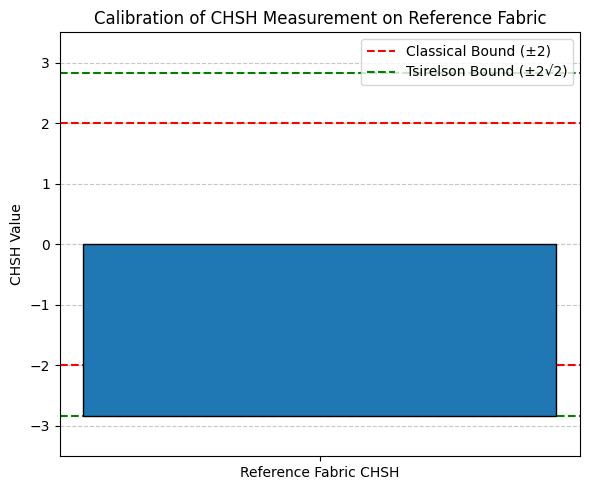

✅ Cell 25 executed successfully.


In [42]:
# Cell 25: Visualize Measurement Calibration
# Description:
# This cell plots the result of the calibration test. A perfect match between the
# measured CHSH value and the theoretical Tsirelson bound for the reference fabric
# provides visual confirmation that our measurement apparatus is trustworthy.

with open("chsh_benchmark.pkl", "rb") as f:
    CHSH_benchmark = pickle.load(f)["CHSH_benchmark"]

plt.figure(figsize=(6, 5))
plt.bar(["Reference Fabric CHSH"], [CHSH_benchmark], color='C0', edgecolor='k', zorder=3)
plt.ylabel("CHSH Value")
plt.title("Calibration of CHSH Measurement on Reference Fabric")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

plt.axhline(2.0, color='r', linestyle='--', label="Classical Bound (±2)")
plt.axhline(-2.0, color='r', linestyle='--')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson Bound (±2√2)")
plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--')

plt.ylim(-3.5, 3.5)
plt.legend()
plt.tight_layout()
plt.savefig("chsh_benchmark.png")

print("---- Cell 25: Visualize Measurement Calibration ----")
print("Plot saved as 'chsh_benchmark.png'. ✅")
plt.show()
print("✅ Cell 25 executed successfully.")

In [43]:
# Cell 26: Characterize Stability of the Reference Fabric
# Description:
# This cell characterizes the stability of the nonlocality property itself. We perform a
# controlled transformation of the reference fabric, mixing it with a completely random
# (maximally mixed) fabric. We then track how the intrinsic nonlocality parameter (CHSH)
# changes as a function of this transformation.

# 1. Load the reference fabric and define probe operators
with open("R_singlet_benchmark.pkl", "rb") as f: rho_base = pickle.load(f)
with open("pauli_matrices.pkl", "rb") as f: pauli = pickle.load(f)
Z, X = pauli['Z'], pauli['X']
A1, A2 = Z, X
B1, B2 = (Z + X) / np.sqrt(2), (Z - X) / np.sqrt(2)
M_A1, M_A2 = np.kron(A1, np.eye(2)), np.kron(A2, np.eye(2))
M_B1, M_B2 = np.kron(np.eye(2), B1), np.kron(np.eye(2), B2)

# 2. Define mixing probabilities and prepare for sweep
mix_probs = np.linspace(0.0, 1.0, 21) # p from 0 (pure) to 1 (random)
transformed_chsh_values = []
random_fabric = np.eye(4) / 4.0

# 3. Systematically transform the fabric and measure its nonlocality
for p in tqdm(mix_probs, desc="Transforming reference fabric"):
    # Transformed fabric ρ' = (1-p)ρ_ref + p*ρ_rand
    transformed_fabric = (1 - p) * rho_base + p * random_fabric
    
    chsh_transformed = correlation(M_A1, M_B1, transformed_fabric) + \
                       correlation(M_A1, M_B2, transformed_fabric) + \
                       correlation(M_A2, M_B1, transformed_fabric) - \
                       correlation(M_A2, M_B2, transformed_fabric)
    transformed_chsh_values.append(chsh_transformed)

with open("fabric_stability.pkl", "wb") as f:
    pickle.dump({"mix_probs": mix_probs, "CHSH_values": transformed_chsh_values}, f)

print("\n---- Cell 26: Characterize Stability of the Reference Fabric ----")
print("Fabric transformation data saved. ✅")
print("✅ Cell 26 executed successfully.")

Transforming reference fabric: 100%|██████████| 21/21 [00:00<00:00, 7610.85it/s]


---- Cell 26: Characterize Stability of the Reference Fabric ----
Fabric transformation data saved. ✅
✅ Cell 26 executed successfully.


---- Cell 27: Plot Fabric Stability Profile ----
Plot saved as 'fabric_stability_profile.png'. ✅


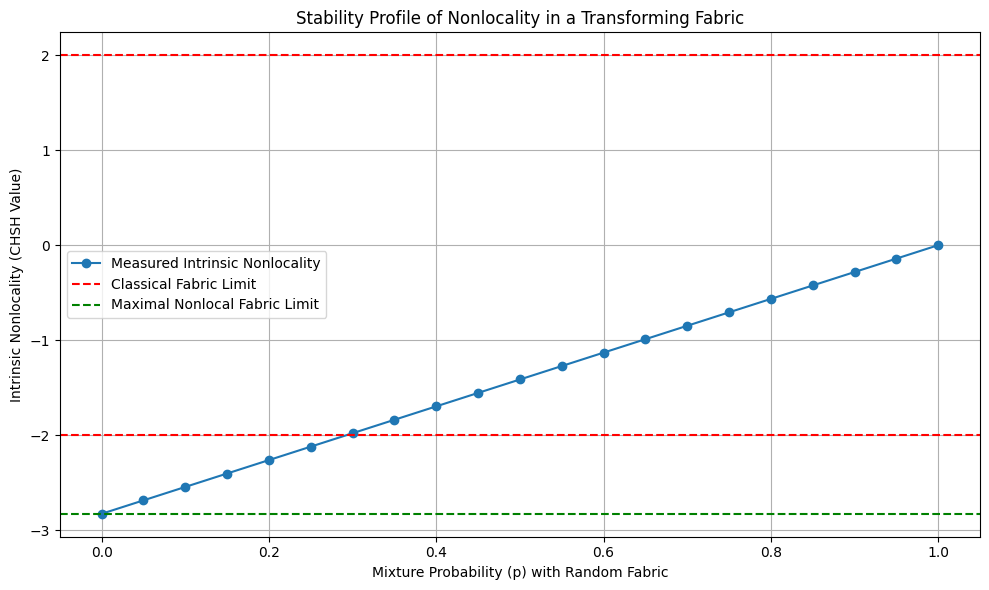

✅ Cell 27 executed successfully.


In [44]:
# Cell 27: Plot Fabric Stability Profile
# Description:
# This cell plots the results of the fabric transformation study. It shows how the
# intrinsic nonlocality parameter (CHSH) of a computational fabric changes as it is
# interpolated between a perfect singlet structure and a random structure.

# 1. Load the stability data from the correct file
try:
    with open("fabric_stability.pkl", "rb") as f:
        data = pickle.load(f)
    mix_probs = data["mix_probs"]
    transformed_chsh_values = data["CHSH_values"]

    # 2. Create the plot with updated labels reflecting the new perspective
    plt.figure(figsize=(10, 6))
    plt.plot(mix_probs, transformed_chsh_values, marker='o', linestyle='-', label='Measured Intrinsic Nonlocality')
    plt.xlabel("Mixture Probability (p) with Random Fabric")
    plt.ylabel("Intrinsic Nonlocality (CHSH Value)")
    plt.title("Stability Profile of Nonlocality in a Transforming Fabric")
    plt.grid(True)

    # 3. Add classical and quantum bounds for context
    plt.axhline(2.0, color='r', linestyle='--', label="Classical Fabric Limit")
    plt.axhline(-2.0, color='r', linestyle='--')
    plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--', label="Maximal Nonlocal Fabric Limit")

    plt.legend()
    plt.tight_layout()
    plt.savefig("fabric_stability_profile.png")
    
    print("---- Cell 27: Plot Fabric Stability Profile ----")
    print("Plot saved as 'fabric_stability_profile.png'. ✅")
    plt.show()

except FileNotFoundError:
    print("---- Cell 27: Plot Fabric Stability Profile ----")
    print("Error: 'fabric_stability.pkl' not found. Please run Cell 26 to generate it first.")

print("✅ Cell 27 executed successfully.")